In [91]:
import warnings
warnings.filterwarnings("ignore")
import pickle
import pycaret
from pycaret.regression import *
import pandas as pd
import seaborn as sns
from dataprep.eda import create_report
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from tsfresh import extract_features
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh import extract_relevant_features
from tsfresh.feature_extraction import MinimalFCParameters, EfficientFCParameters

In [92]:
df = pd.read_pickle('data/final_without_NaNs_gender_age.pkl')
df.head()

,key,speed,Pelvis_acc_0mean,Pelvis_acc_0std,Pelvis_acc_1mean,Pelvis_acc_1std,Pelvis_acc_2mean,Pelvis_acc_2std,Pelvis_angular_acc_0mean,Pelvis_angular_acc_0std,...,stance_width,dragging_distance,foot_ball_distance,max_knee_angle,max_angular_velocity,body,Bodynr.,Age,Gender,Age group
0,2017_10_1,79.0,0.118889,6.027762,0.027525,5.008630,0.047523,6.035592,0.023546,27.730606,...,1.707407,6.856116,6.857733,101.777628,-0.157342,10,10,15.0,M,U16
1,2017_10_2,82.0,-0.055757,6.241045,0.037591,4.849446,0.028313,5.708206,-0.001195,24.883818,...,1.670061,8.007453,8.006219,105.399043,-0.000337,10,10,15.0,M,U16
2,2017_10_3,78.0,-0.011518,6.504512,-0.034417,5.052209,0.069457,6.443381,0.097228,25.881138,...,1.911737,8.272834,8.273032,109.928203,-0.002581,10,10,15.0,M,U16
3,2017_10_4,77.0,-0.008342,5.849470,0.066699,4.555651,-0.018930,5.330553,-0.000194,22.212814,...,1.546937,8.270136,8.270239,110.922002,-0.040354,10,10,15.0,M,U16
4,2017_10_5,78.0,-0.009478,6.032136,0.025189,4.884982,-0.001451,5.565096,0.004020,23.755271,...,1.694116,8.345373,8.345566,112.529423,-0.114195,10,10,15.0,M,U16


In [45]:
model = setup(data = df, target = 'speed', silent=True, session_id=123, normalize = True, normalize_method='minmax', remove_multicollinearity = True, 
              multicollinearity_threshold = 0.6, feature_selection = True, ignore_features = ['key'], transform_target=True)

,Description,Value
0,session_id,123
1,Target,speed
2,Original Data,"(313, 848)"
3,Missing Values,False
4,Numeric Features,844
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(219, 121)"


create_model_container: 0
master_model_container: 0
display_container: 1
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False,
                                      features_todrop=['key'], id_columns=[],
                                      ml_usecase='regression',
                                      numerical_features=[], target='speed',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                 Advanced_Feature_Selection_Classic(ml_usecase='regression',
                                                    n_jobs=-1, random_state=123,
                                                    subc

In [46]:
best = compare_models(sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,3.4657,22.5633,4.6484,0.7844,0.0588,0.0450,0.0850
gbr,Gradient Boosting Regressor,3.8921,27.4765,5.1113,0.7391,0.0645,0.0506,0.1290
knn,K Neighbors Regressor,3.9292,29.0234,5.2551,0.7279,0.0664,0.0507,0.0160
rf,Random Forest Regressor,3.9452,29.2593,5.3088,0.7219,0.0664,0.0509,0.1430
lightgbm,Light Gradient Boosting Machine,3.9584,27.0903,5.0720,0.7437,0.0653,0.0521,0.1630
ada,AdaBoost Regressor,4.0962,28.8980,5.2864,0.7285,0.0673,0.0533,0.0670
ridge,Ridge Regression,4.1796,27.9628,5.1888,0.7331,0.0664,0.0543,0.0140
br,Bayesian Ridge,4.1909,28.0221,5.1983,0.7327,0.0664,0.0544,0.0210
omp,Orthogonal Matching Pursuit,4.8229,38.6394,6.0822,0.6334,0.0782,0.0630,0.0190
par,Passive Aggressive Regressor,5.1612,40.3371,6.3175,0.6232,0.0816,0.0667,0.0210


create_model_container: 17
master_model_container: 17
display_container: 2
PowerTransformedTargetRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                                max_depth=None, max_features='auto',
                                max_leaf_nodes=None, max_samples=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_jobs=-1, oob_score=False,
                                power_transformer_method='box-cox',
                                powe...
                                regressor=ExtraTreesRegressor(bootstrap=False,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                

In [47]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.6836,13.0387,3.6109,0.8264,0.0482,0.0367
1,3.0563,17.6083,4.1962,0.8695,0.0488,0.0367
2,4.3979,38.9935,6.2445,0.7043,0.0854,0.0634
3,4.5750,37.7007,6.1401,0.5638,0.0769,0.0593
4,2.4684,11.5292,3.3955,0.8822,0.0416,0.0312
5,2.9763,14.9489,3.8664,0.8744,0.0443,0.0351
6,3.9617,24.6956,4.9695,0.7557,0.0635,0.0503
7,3.7294,28.4404,5.3330,0.7739,0.0604,0.0443
8,3.8822,24.0777,4.9069,0.6874,0.0675,0.0542


create_model_container: 18
master_model_container: 18
display_container: 3
PowerTransformedTargetRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                                max_depth=None, max_features='auto',
                                max_leaf_nodes=None, max_samples=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_jobs=-1, oob_score=False,
                                power_transformer_method='box-cox',
                                powe...
                                regressor=ExtraTreesRegressor(bootstrap=False,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                

In [48]:
tuned_et = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.9693,22.0519,4.6959,0.7064,0.0639,0.0542
1,3.7406,29.5238,5.4336,0.7813,0.0598,0.0435
2,6.1025,67.3713,8.2080,0.4892,0.1149,0.0891
3,4.1994,36.2175,6.0181,0.5810,0.0731,0.0528
4,3.7598,22.3993,4.7328,0.7712,0.0581,0.0465
5,4.5573,33.2935,5.7701,0.7202,0.0662,0.0534
6,4.4565,33.1020,5.7534,0.6725,0.0737,0.0574
7,4.6761,35.7571,5.9797,0.7158,0.0705,0.0573
8,4.6379,34.1183,5.8411,0.5570,0.0852,0.0676


create_model_container: 19
master_model_container: 19
display_container: 4
PowerTransformedTargetRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                                max_depth=8, max_features='sqrt',
                                max_leaf_nodes=None, max_samples=None,
                                min_impurity_decrease=0.0001,
                                min_impurity_split=None, min_samples_leaf=2,
                                min_samples_split=5,
                                min_weight_fraction_leaf=0.0, n_estimators=240,
                                n_jobs=-1, oob_score=False,
                                power_transformer_method='box-cox',
                                powe...
                                regressor=ExtraTreesRegressor(bootstrap=False,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                

In [49]:
print(tuned_et)

PowerTransformedTargetRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                                max_depth=8, max_features='sqrt',
                                max_leaf_nodes=None, max_samples=None,
                                min_impurity_decrease=0.0001,
                                min_impurity_split=None, min_samples_leaf=2,
                                min_samples_split=5,
                                min_weight_fraction_leaf=0.0, n_estimators=240,
                                n_jobs=-1, oob_score=False,
                                power_transformer_method='box-cox',
                                powe...
                                regressor=ExtraTreesRegressor(bootstrap=False,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=8,
                                

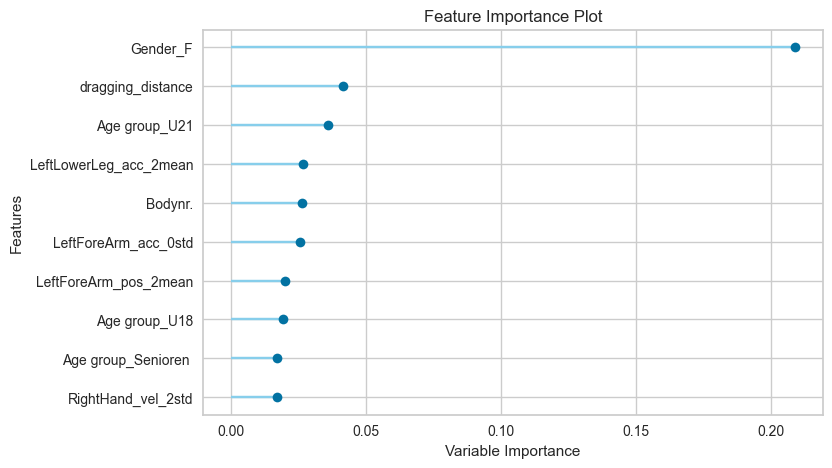

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [50]:
plot_model(tuned_et, plot='feature')

In [93]:
df = df.drop(columns=['Gender','Age', 'Gender', 'Age group'])
df.isnull().values.any()
df = df.astype(np.float64)

In [95]:
speed = df.drop(columns=['Bodynr.'])
speed = speed[speed['speed'].notna()]
y = speed['speed']

In [96]:
speed.head()

,key,speed,Pelvis_acc_0mean,Pelvis_acc_0std,Pelvis_acc_1mean,Pelvis_acc_1std,Pelvis_acc_2mean,Pelvis_acc_2std,Pelvis_angular_acc_0mean,Pelvis_angular_acc_0std,...,LeftFoot_pos_1mean,LeftFoot_pos_1std,LeftFoot_pos_2mean,LeftFoot_pos_2std,stance_width,dragging_distance,foot_ball_distance,max_knee_angle,max_angular_velocity,body
0,2017101.0,79.0,0.118889,6.027762,0.027525,5.008630,0.047523,6.035592,0.023546,27.730606,...,7.602339,1.373352,0.203275,0.057795,1.707407,6.856116,6.857733,101.777628,-0.157342,10.0
1,2017102.0,82.0,-0.055757,6.241045,0.037591,4.849446,0.028313,5.708206,-0.001195,24.883818,...,7.851223,1.363163,0.211607,0.056276,1.670061,8.007453,8.006219,105.399043,-0.000337,10.0
2,2017103.0,78.0,-0.011518,6.504512,-0.034417,5.052209,0.069457,6.443381,0.097228,25.881138,...,8.030355,1.295045,0.217697,0.063391,1.911737,8.272834,8.273032,109.928203,-0.002581,10.0
3,2017104.0,77.0,-0.008342,5.849470,0.066699,4.555651,-0.018930,5.330553,-0.000194,22.212814,...,7.963341,1.467437,0.211896,0.056749,1.546937,8.270136,8.270239,110.922002,-0.040354,10.0
4,2017105.0,78.0,-0.009478,6.032136,0.025189,4.884982,-0.001451,5.565096,0.004020,23.755271,...,8.015781,1.443887,0.216884,0.063552,1.694116,8.345373,8.345566,112.529423,-0.114195,10.0


In [97]:
cols = ['foot_ball_distance']

for col in cols:
    extracted_features = extract_features(df, column_id="body", column_sort="key", 
                                          n_jobs=5, column_kind=None, column_value=col, 
                                          show_warnings=False)
    extracted_features = extracted_features.reset_index()
    extracted_features = extracted_features.rename(columns={"index": "body"})
    gender = gender.merge(extracted_features, how='left', on=['body'])

Feature Extraction:  74%|█████████████████████████████████████████████▊                | 17/23 [00:03<00:01,  5.64it/s]


IndexError: index -1 is out of bounds for axis 0 with size 0